In [10]:
import tensorflow as tf
import tensorflow_probability as tfp
from random import random, seed
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
from matplotlib import cm

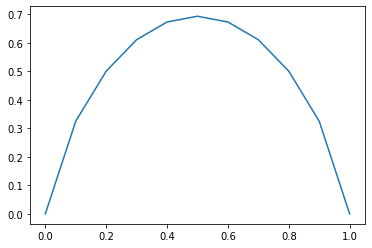

In [2]:
xs = []
entropies = []
for i in range(11):
    x = 0.1 * i
    xs.append(x)
    dist = tfp.distributions.Bernoulli(probs=[x])
    entropies.append(dist.entropy())

plt.plot(xs, entropies)

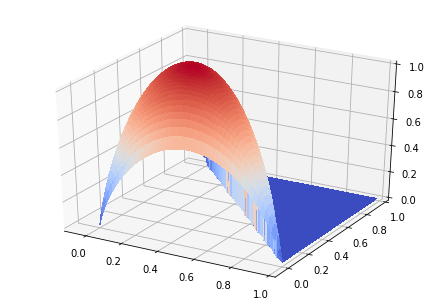

In [12]:

fig = plt.figure()

ax = Axes3D(fig) #<-- Note the difference from your original code...

l = 100

X = np.arange(0, 1, 1/l)
Y = np.arange(0, 1, 1/l)
X, Y = np.meshgrid(X, Y)
Z = 1 - X - Y
X = X.reshape(l**2)
Y = Y.reshape(l**2)
Z = Z.reshape(l**2)
probs = list(zip(X, Y, Z))
dist = tfp.distributions.Categorical(probs=probs)
ent = np.nan_to_num(dist.entropy().numpy().reshape(l,l))

ax.set_zlim(0, 1.0)
ax.set_xlim(-.1, 1.01)
ax.set_ylim(-.1, 1.01)

surf = ax.plot_surface(X.reshape(l,l), Y.reshape(l,l), ent, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()